# Titanic - Machine Learning from Disaster
# Decision Tree

## Purpose
Practicing Decision Trees

## Data
We use the original dataset used for the competition.<br>
https://www.kaggle.com/competitions/titanic/data

The target variable is 'Survived'.

| Variable | Definition | Key |
| :- | :- | :- |
survival | Survival | 0 = No, 1 = Yes
pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
sex | Sex	
Age | Age in years	
sibsp | # of siblings / spouses aboard the Titanic	
parch | # of parents / children aboard the Titanic	
ticket | Ticket number	
fare | Passenger fare	
cabin | Cabin number	
embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

from sklearn.impute import SimpleImputer

from dython import nominal

from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

from scipy import stats

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn import tree

from sklearn.ensemble import BaggingClassifier


In [2]:
df = pd.read_csv("C:\SharpestMinds\Datasets\Titanic\\train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Age'] = df['Age'].apply(np.ceil)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
# Check for missing values
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are 177 (20%) missing values in 'Age' and 687 (77%) in 'Cabin'.

https://www.theanalysisfactor.com/missing-data-mechanism/<br>
https://towardsdatascience.com/missing-value-handling-missing-data-types-a89c0d81a5bb

### EDA

#### Features' Distribution
Histogram for continuous variables and bar chart for categoricals

Numerical: ['Age', 'SibSp', 'Parch', 'Fare']
Categorical: ['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']


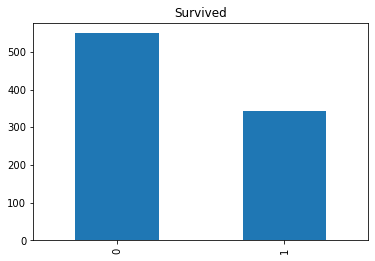

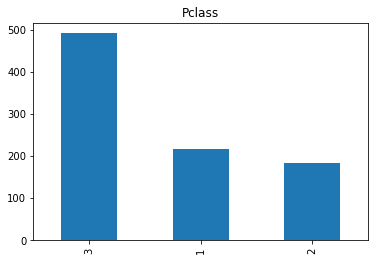

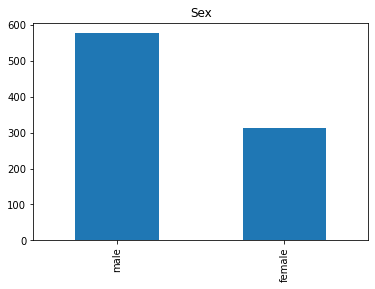

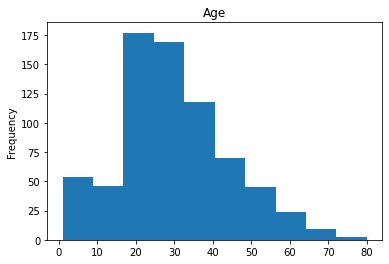

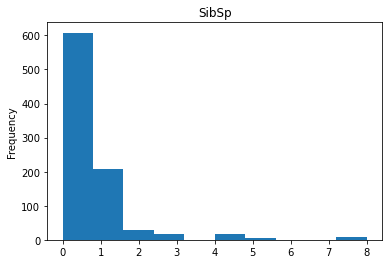

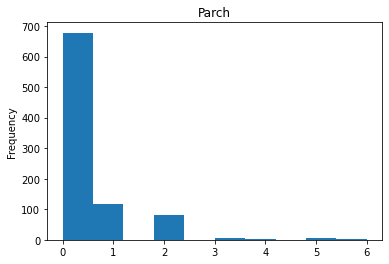

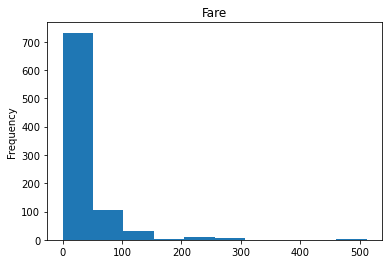

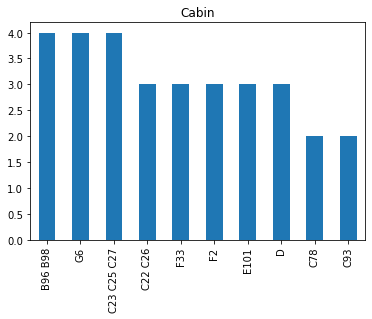

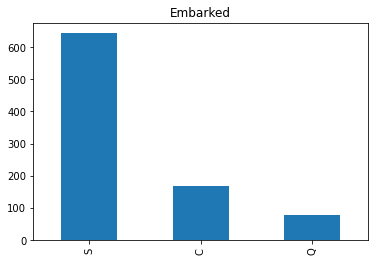

In [11]:
num_list = ['Age','SibSp','Parch','Fare']
cat_list = ['Survived','Pclass','Sex','Cabin','Embarked']
for column in df:
    plt.figure(column)
    plt.title(column)
    if column in num_list:
        df[column].plot(kind='hist')
    elif column in cat_list:
        df[column].value_counts()[:10].plot(kind='bar')
        
print('Numerical:',num_list)
print('Categorical:',cat_list)

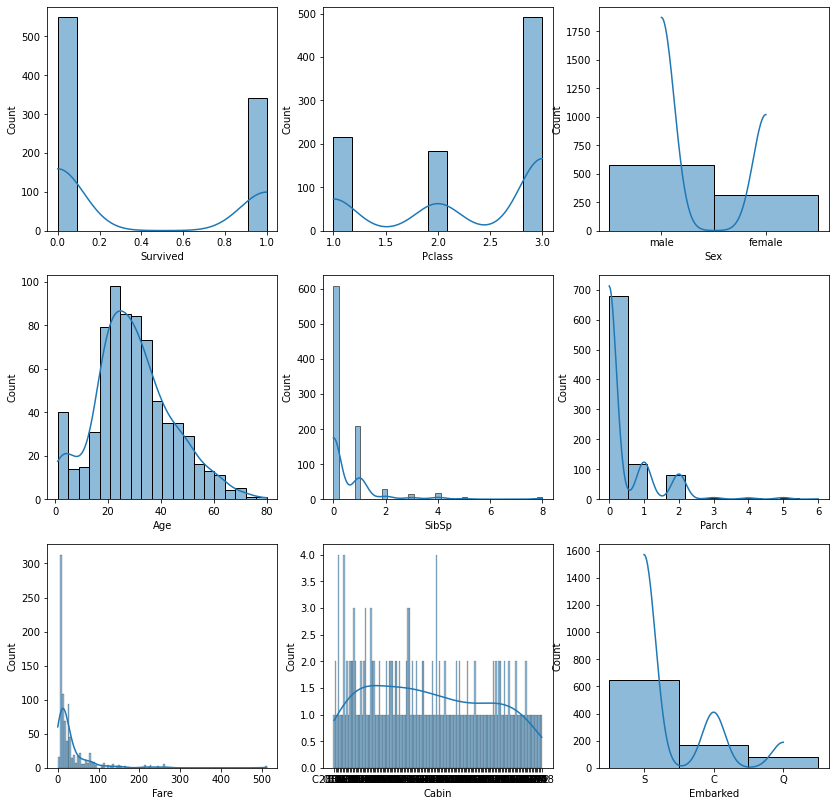

In [12]:
fig, axs = plt.subplots(3, 3, figsize=(14,14))

for column in enumerate(df.columns):
        sns.histplot(data=df, x=column[1], kde=True, ax=axs[(column[0])//3, (column[0])%3])
    
plt.show()

##### Age distribution
We look at the age distribution subsets to gain information for treating the missing values issue.

In [13]:
age_female = df[(df['Sex']=='female')&(df['Age'].notnull())]['Age']
age_male = df[(df['Sex']=='male')&(df['Age'].notnull())]['Age']

[Text(0.5, 1.0, 'male')]

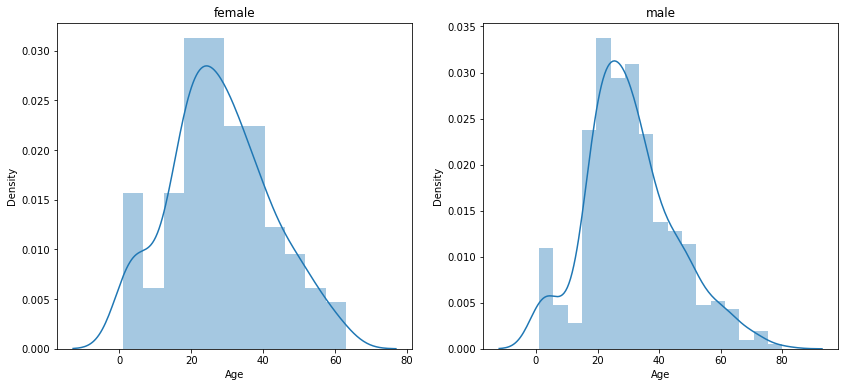

In [14]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(14, 6)

plot1 = sns.distplot(age_female, ax=axs[0])
plot1.set(title='female')

plot2 = sns.distplot(age_male, ax=axs[1])
plot2.set(title='male')

##### Outliers
Histogram plot of the age suggests the existence of outliers. However, the data points outside our boxplot bounderies are not distance enough to be justified as outliers.

[Text(0.5, 1.0, 'male')]

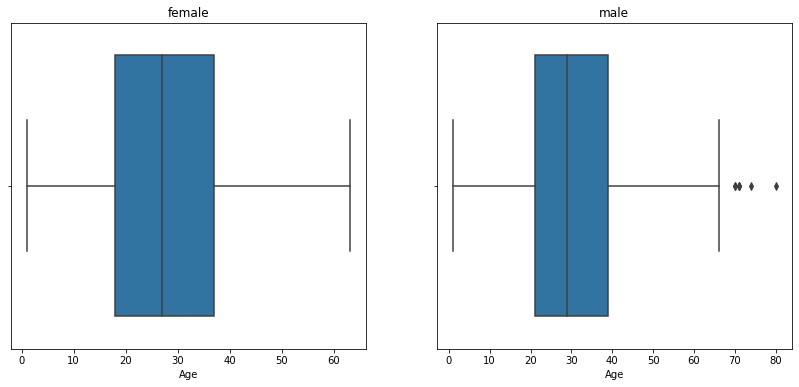

In [15]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(14, 6)

plot1 = sns.boxplot(age_female, ax=axs[0])
plot1.set(title='female')

plot2 = sns.boxplot(age_male, ax=axs[1])
plot2.set(title='male')

##### Missing Values
'Cabin' has too many missing values. So we will remove it for this project. 
Based on the skewed graph of 'Age' we choose median as the imputer. We also use mode for the 2 missing 'Cabin' values.

In [16]:
print('female age, median:',age_female.median())
print('male age, median:',age_male.median())
print('Embarked, mode:', df.mode()['Embarked'][0])

female age, median: 27.0
male age, median: 29.0
Embarked, mode: S


In [17]:
df['Embarked'].mode()

0    S
dtype: object

In [18]:
df_m = df.drop('Cabin',axis=1).copy(deep=True)
df_m.loc[(df['Sex']=='female')&(df['Age'].isnull()),'Age'] = age_female.median()
df_m.loc[(df['Sex']=='male')&(df['Age'].isnull()),'Age'] = age_male.median()
df_m.loc[(df['Embarked'].isnull()), 'Embarked'] = df.mode()['Embarked'][0]

In [19]:
df_m.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Correlations
We have both categorical and numeric features in our dataset. So instead of the usual correlation heatmap, we use a hybrid method implemented in a python package called 'dython'.<br>
http://shakedzy.xyz/dython/modules/nominal/<br>
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

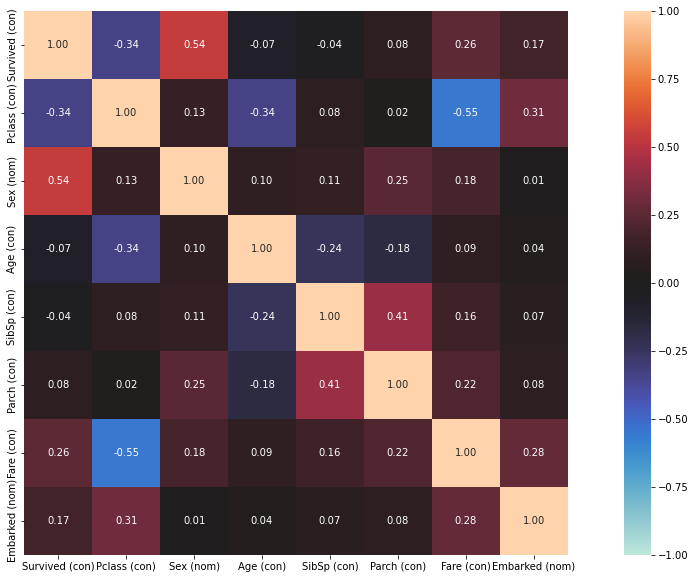

In [20]:
# http://shakedzy.xyz/dython/
nominal.associations(df_m,figsize=(20,10),mark_columns=True,nom_nom_assoc='theil');

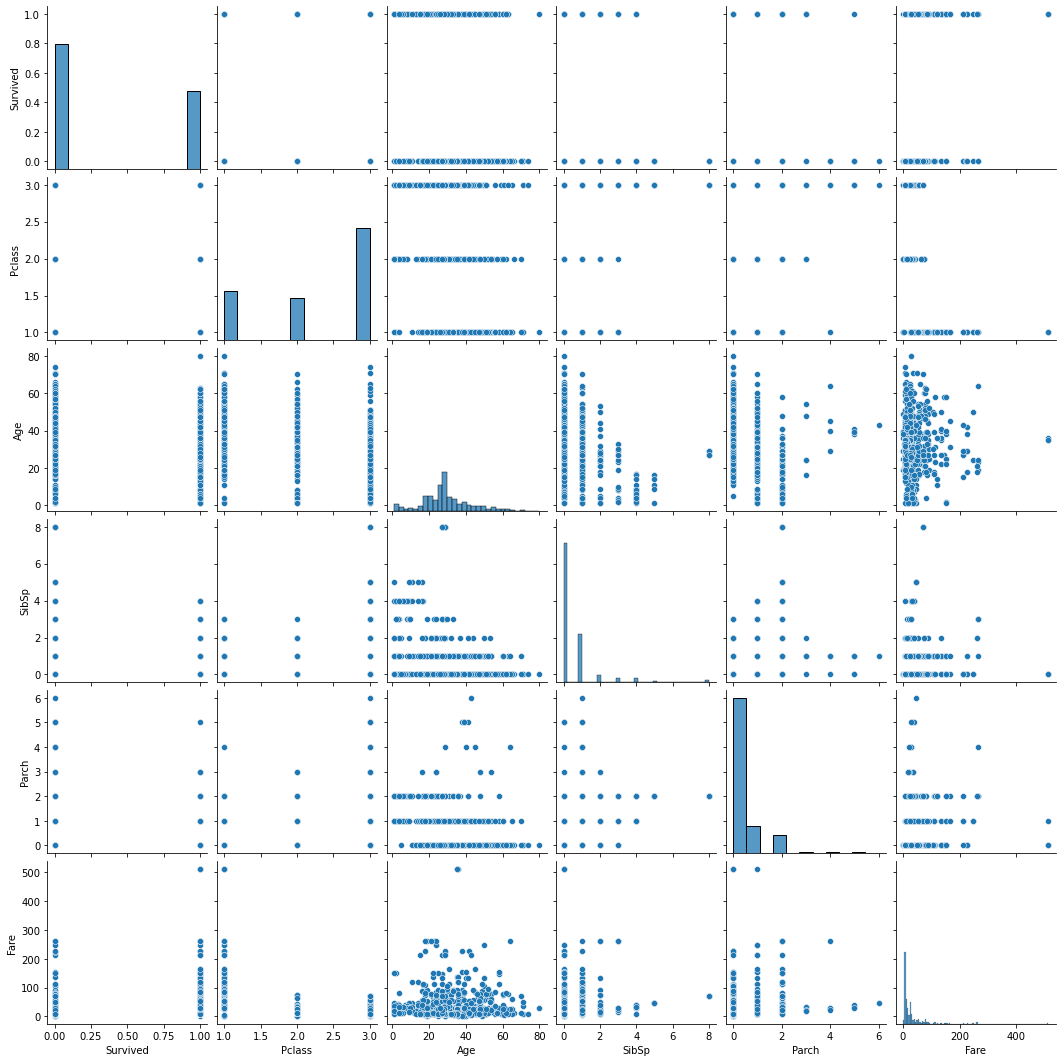

In [21]:
sns.pairplot(df_m)

### Data Preparation for Decision Tree

In [22]:
for column in df[['Survived','Pclass','Sex','Cabin','Embarked']].columns:
    df[column]=df[column].astype('category')

In [23]:
enc = OrdinalEncoder()
enc.fit(df_m[['Survived', 'Pclass','Sex','Embarked']])
df_m[['Survived', 'Pclass','Sex','Embarked']] = enc.transform(df_m[['Survived', 'Pclass','Sex','Embarked']])

### Best Tree Depth

In [24]:
cv = KFold(n_splits=10,shuffle=True,random_state=60)
accuracy_m = []
accuracy_s = []
features_num = len(list(df_m))

In [25]:
for depth in range(1, features_num):
    d_model = DecisionTreeClassifier(max_depth=depth)
    d_score = cross_val_score(d_model, df_m.iloc[:,1:],df_m.iloc[:,0], scoring='accuracy', cv=cv, n_jobs=-1)
    accuracy_m.append(np.mean(d_score))
    accuracy_s.append(np.std(d_score))

acc_df = pd.DataFrame({'Depth':[*range(1, features_num)], 
                       'Accuracy-Mean':accuracy_m, 'Accuracy-Standard Deviation':accuracy_s})
print(acc_df)

   Depth  Accuracy-Mean  Accuracy-Standard Deviation
0      1       0.786754                     0.030158
1      2       0.771061                     0.023481
2      3       0.820424                     0.032570
3      4       0.822659                     0.034060
4      5       0.821536                     0.037134
5      6       0.820400                     0.038702
6      7       0.826017                     0.034992


Maximum depth of 4 seems to be the best option to avoid overfitting.

### The Final Tree

In [26]:
cv = KFold(n_splits=10, random_state=60, shuffle=True)
k_model = DecisionTreeClassifier(max_depth=4)
y_pred = k_model.fit(df_m.iloc[:,1:],df_m.iloc[:,0]).predict(df_m.iloc[:,1:])
print(classification_report(df_m.iloc[:,0],y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       549
         1.0       0.85      0.70      0.77       342

    accuracy                           0.84       891
   macro avg       0.84      0.81      0.82       891
weighted avg       0.84      0.84      0.83       891



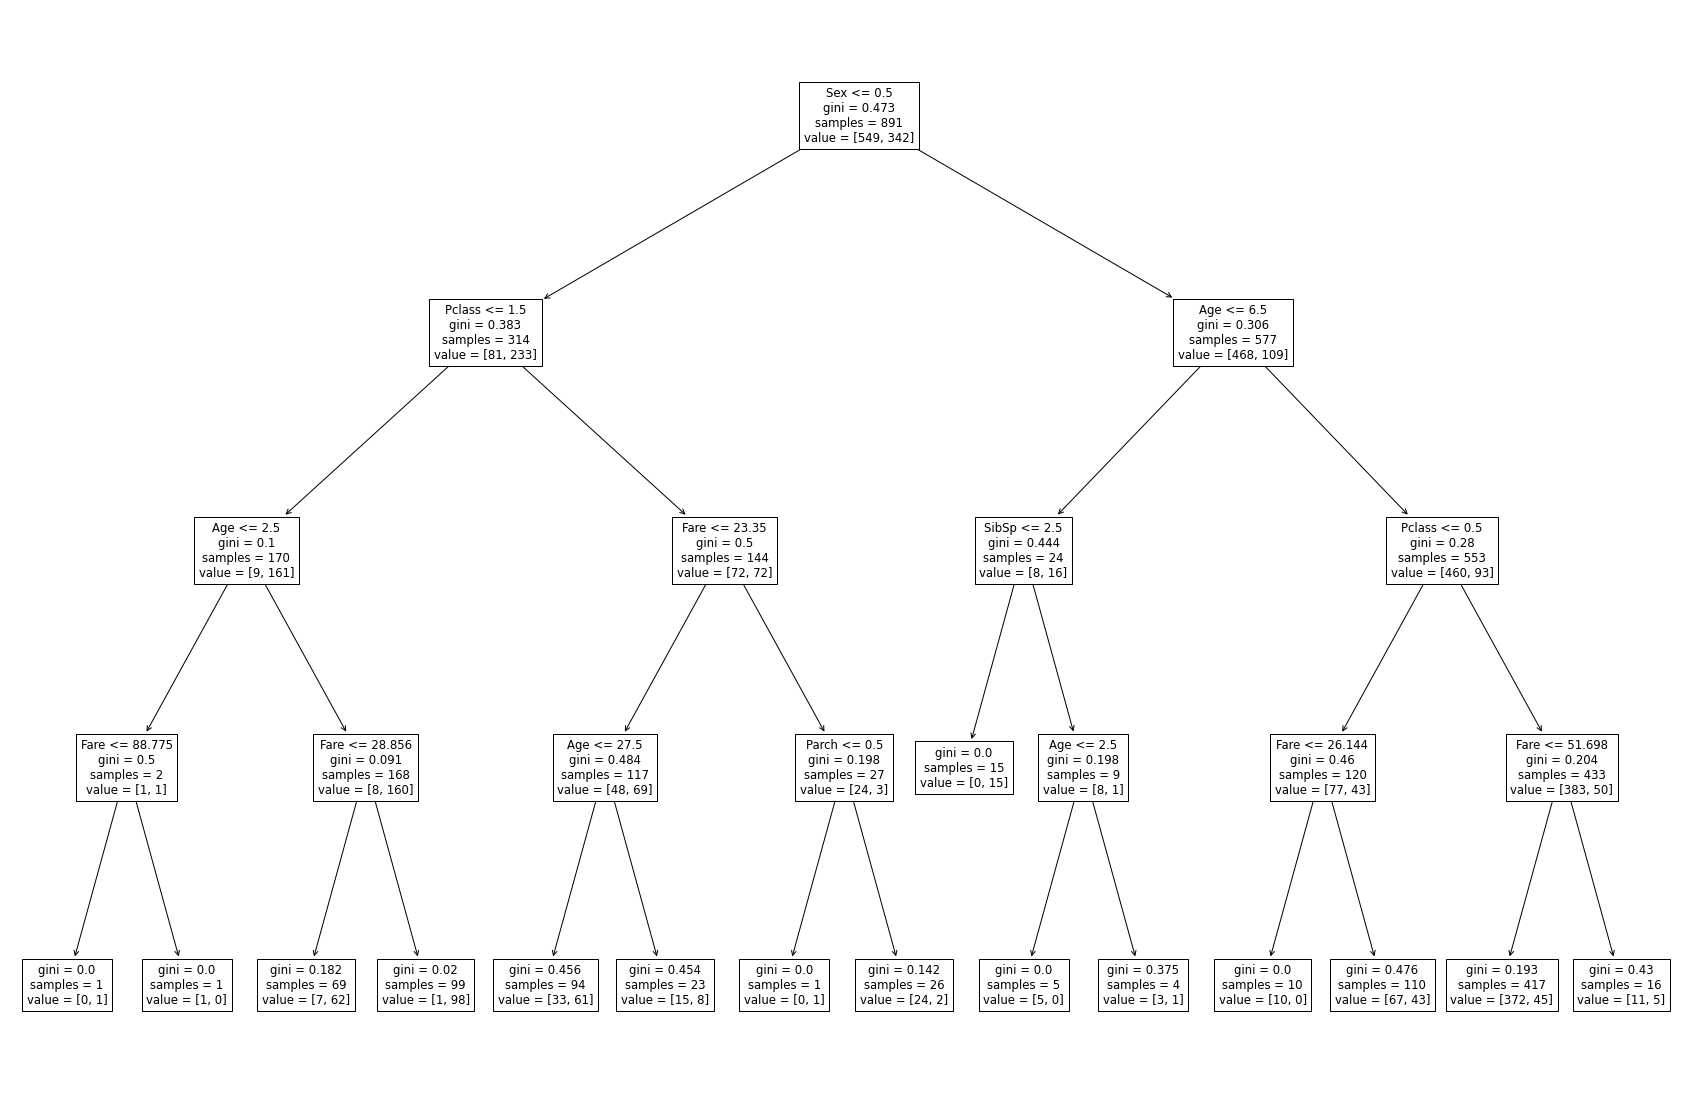

In [27]:
fig = plt.figure(figsize=(30,20))
tree.plot_tree(k_model, feature_names=df_m.iloc[:,1:].columns);

### Bagging Classifier
Bootsraps Aggregating, or Bagging
https://machinelearningmastery.com/bagging-ensemble-with-python/<br>
Creating multiple trees on subsets of the data.

In [28]:
cv = KFold(n_splits=10, random_state=60, shuffle=True)
dt_model=DecisionTreeClassifier(max_depth=4)
bc_model=BaggingClassifier(dt_model)
bc_y_pred=bc_model.fit(df_m.iloc[:,1:],df_m.iloc[:,0]).predict(df_m.iloc[:,1:])
print(classification_report(df_m.iloc[:,0],bc_y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       549
         1.0       0.91      0.68      0.78       342

    accuracy                           0.85       891
   macro avg       0.87      0.82      0.83       891
weighted avg       0.86      0.85      0.85       891



### Random Forest
https://machinelearningmastery.com/random-forest-ensemble-in-python/<br>
Similar to bagging; with the addition of selecting a random subset of features as well.

In [29]:
from sklearn.ensemble import RandomForestClassifier

cv = KFold(n_splits=10, random_state=60, shuffle=True)
rf_model = RandomForestClassifier()
rf_model_fit = rf_model.fit(df_m.iloc[:,1:],df_m.iloc[:,0])
y_pred = rf_model_fit.predict(df_m.iloc[:,1:])
print(classification_report(df_m.iloc[:,0],y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       549
         1.0       0.98      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.97      0.98       891
weighted avg       0.98      0.98      0.98       891



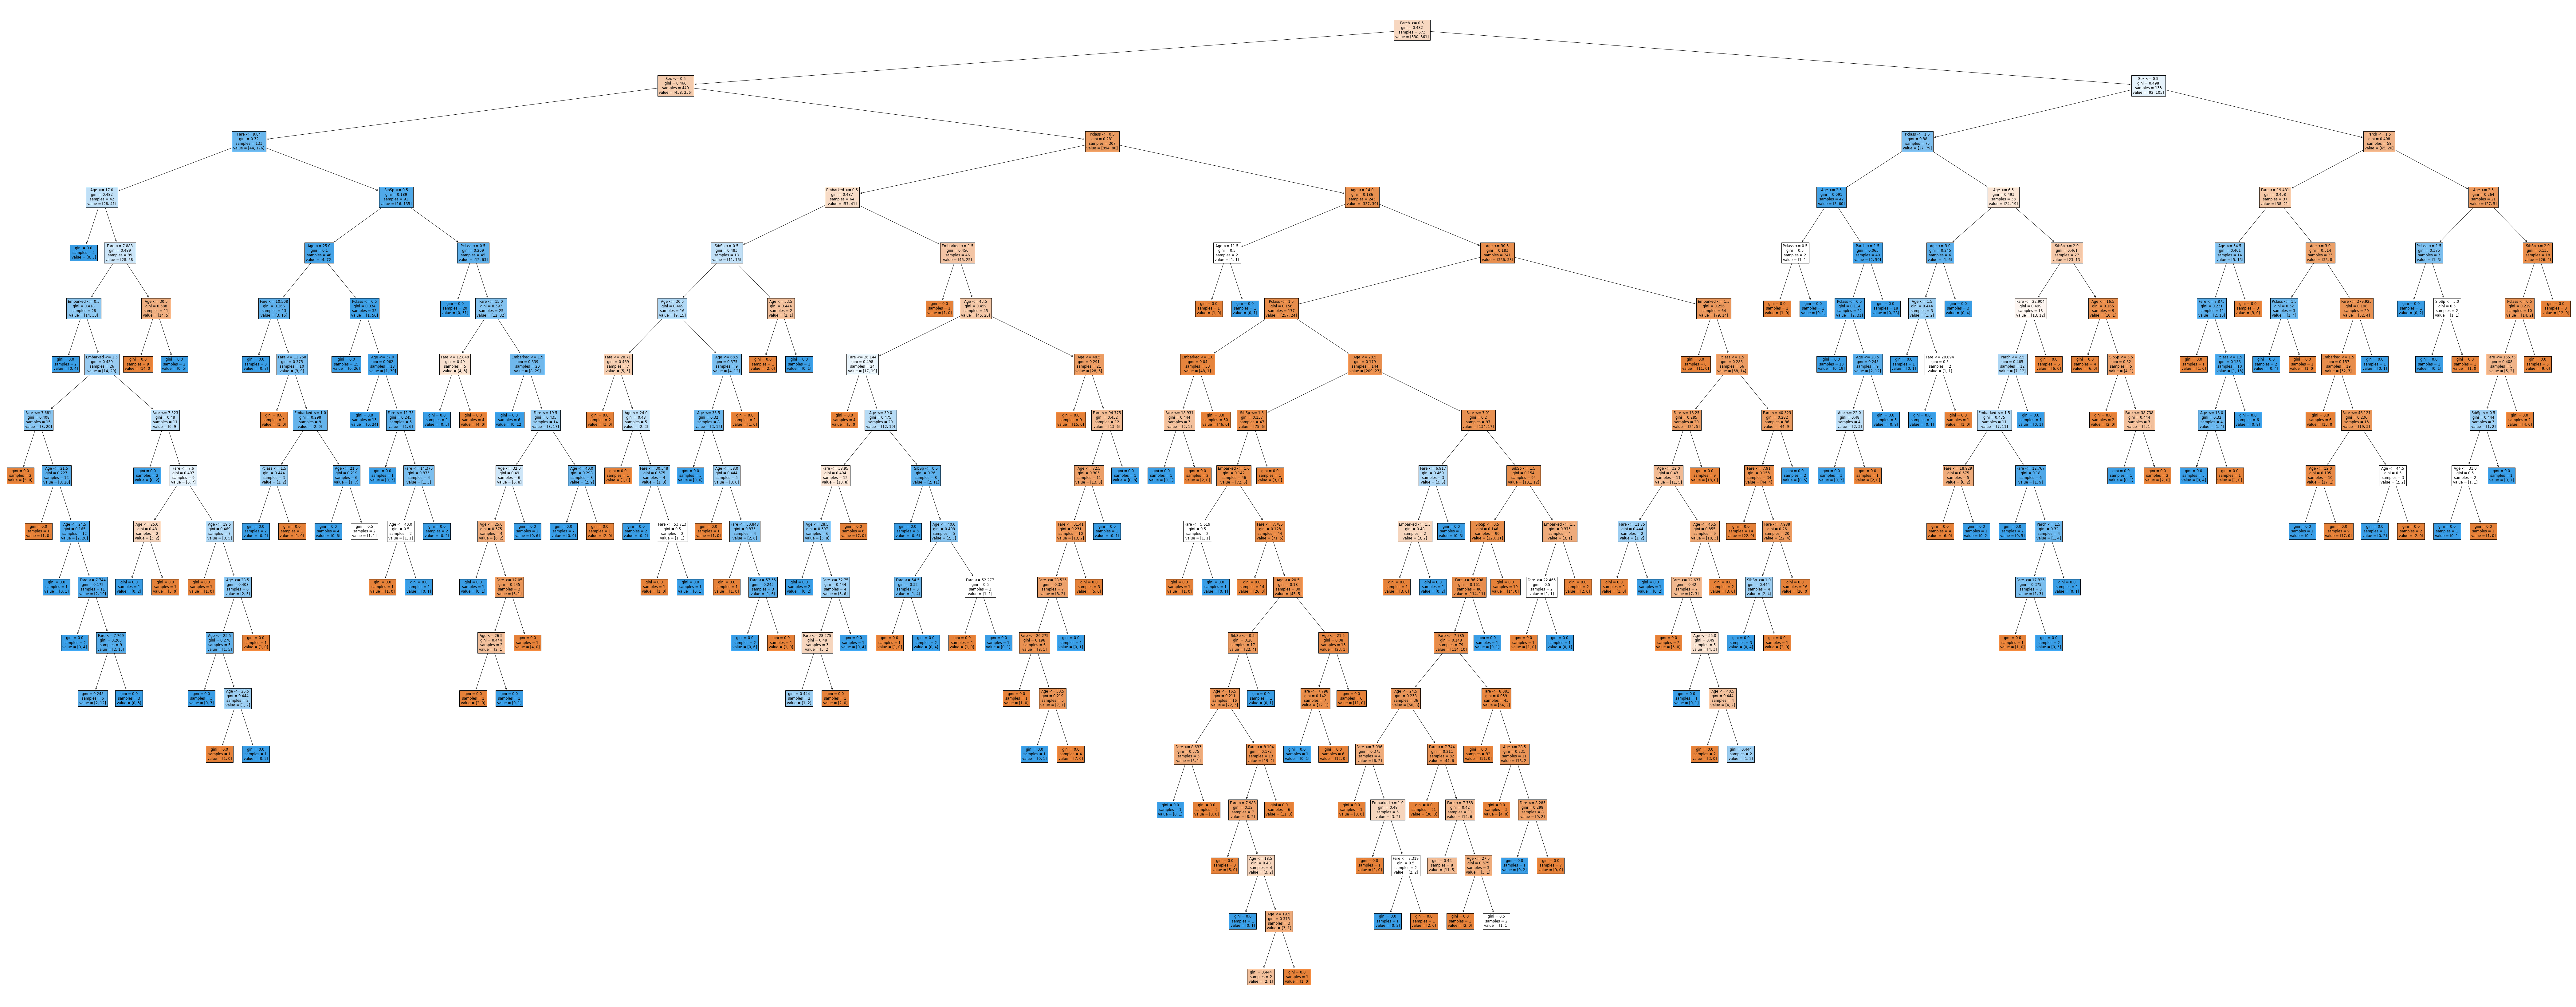

In [30]:
fig = plt.figure(figsize=(150,60))
tree.plot_tree(rf_model_fit.estimators_[0],filled=True, feature_names=df_m.iloc[:,1:].columns);